In [2]:
from datetime import timedelta, datetime, date

from graphprocessing import *
from models.greed import Greed
#from models.hs import RSL, TRM_RSL, RSLL
from models.local_ratio import Local_Ratio
from models.trm import TRM
from models.uga import UGA_RSL, RSL1


class Testing:
    def test_(self, algorithms, data, interval, start_time_, epsilon, radius):
        print('started thread')
        start_time_dt = data[start_time_][np.random.choice(data.index)]
        td = timedelta(minutes=interval)
        graph = build_cwgraph(data, start_time_dt, start_time_dt + td, radius=radius, epsilon=epsilon)
        while len(graph.nodes) < 4:
            print('failed')
            start_time_dt = data[start_time_][np.random.choice(data.index)]
            graph = build_cwgraph(data, start_time_dt, start_time_dt + td, radius=radius, epsilon=epsilon)
        print('nodes:', len(graph.nodes))
        temp = []
        tempt = []
        for algo in algorithms:
            print(str(algo))
            start = datetime.now()
            score = algo.test(graph)[1]
            temp.append(score)
            tempt.append((datetime.now() - start).total_seconds())
            print(score)
        return (temp, tempt, len(list(graph.nodes)), start_time_dt, get_shortest_assignment(graph))

    def test(self, algorithms, data, interval, start_time_='started_at', epsilon=1.0, radius=500, trials=10):
        self.scores = []
        # epochs = int((max(data.starttime)-start_time).total_seconds()/(60*15))
        self.runtimes = []
        self.graphs = []
        self.times = []
        results = []
        for i in range(trials):
            results.append(self.test_(algorithms, data, interval, start_time_, epsilon, radius))
        scores = [results[i][0] for i in range(len(results))]
        runtimes = [results[i][1] for i in range(len(results))]
        graph_sizes = [results[i][2] for i in range(len(results))]
        times = [results[i][3] for i in range(len(results))]
        sdists = [results[i][4] for i in range(len(results))]
        return scores, runtimes, times, graph_sizes, sdists


def run_test(data, name='citi', interval=1):
    testing = Testing()
    scores, runtimes, times, graphs, sdists = testing.test([Greed(), UGA_RSL(), RSL1(), Local_Ratio(), TRM(), RSL(), TRM_RSL(), RSLL()],
                                                           data, interval=interval, epsilon=0.2, trials=5)

    cols = ['Greed', 'UGA_RSL', 'RSL1', 'Local_Ratio', 'TRM', 'RSL', 'TRM_RSL', 'RSLL']
    # cols=['Greed']
    scores_df = pd.DataFrame(np.abs(scores),
                             columns=cols)
    runtimes_df = pd.DataFrame(np.abs(runtimes),
                               columns=cols)
    scores_df.to_csv('outputs/scores_' + name + '.csv')
    runtimes_df.to_csv('outputs/runtimes_' + name + '.csv')
    times_df = pd.DataFrame(times)
    graphs_df = pd.DataFrame(graphs)
    times_df.to_csv('outputs/times_' + name + '.csv')
    graphs_df.to_csv('outputs/graphs_' + name + '.csv')
    sdists_df = pd.DataFrame(sdists)
    sdists_df.to_csv('outputs/sdists_'+name+'.csv')


def metrodate(s):
    date, time = s.split(' ')
    month, day, year = date.split('/')

    hour, minute = time.split(':')
    return {'month': int(month), 'day': int(day), 'year': int(year), 'hour': int(hour), 'minute': int(minute)}

metro = pd.read_csv('data/metro-trips-2021-q1.csv')
metro[start_time] = metro['start_time'].apply(lambda x: datetime(**metrodate(x)))
metro[end_time] = metro['end_time'].apply(lambda x: datetime(**metrodate(x)))
metro[start_station_name] = metro['start_station'].apply(str)
metro[end_station_name] = metro['end_station'].apply(str)
metro[start_lat] = metro['start_lat']
metro[start_lng] = metro['start_lon']
metro[end_lng] = metro['end_lon']
metro[end_lng] = metro['end_lon']

#run_test(metro, name='metro', interval=180)

# graph = build_station_graph(data,data.loc[0,start_time],data.loc[0,start_time]+timedelta(minutes=15))
# print(graph['E 6 St & Avenue D'])
# overflow = {node:{} for node in graph.nodes() if graph.nodes[node]['type']=='overflow'}
# underflow = {node:{} for node in graph.nodes() if graph.nodes[node]['type']=='underflow'}
# print('edgesss',graph.edges)
# print('vertixxx',graph.nodes)
#

# cgraph = cloned_station_vertices(graph)

data = pd.read_csv('data/202105-citibike-tripdata.csv')
data = data.loc[[type(i) == str for i in data[start_station_name]]]
data = data.loc[[type(i) == str for i in data[end_station_name]]]
# data = data.loc[data.index[:10000]]
data[start_time] = data[start_time].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
data[end_time] = data[end_time].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

#run_test(data, name='citi')

# ur = UGA_RSL()
# print(ur.find_optimal(cwgraph))
# u = UGA()
# print(u.find_optimal(cwgraph))


/Users/trentjohnson/Documents/GT/Temple/improveTRM/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
interval = 120
radius = 50
epsilon = 20
start_time_dt = data[start_time][np.random.choice(data.index)]
#start_time_dt = datetime(day=5,month=5,year=2021,hour=7:30)
td = timedelta(minutes=interval)
cwgraph = build_cwgraph(data, start_time_dt, start_time_dt + td, radius=radius, epsilon=epsilon)
overflow = [node for node in cwgraph.nodes() if cwgraph.nodes[node]['type'] == 'overflow']
underflow = [node for node in cwgraph.nodes() if cwgraph.nodes[node]['type'] == 'underflow']
worker = [node for node in cwgraph.nodes() if cwgraph.nodes[node]['type'] == 'worker']

adding vertex data


In [3]:
from aabbtree import AABB
from aabbtree import AABBTree

In [4]:
wexy = [(cwgraph.nodes[node]['xs'],cwgraph.nodes[node]['ys']) for node in worker] 
wsxy = [(cwgraph.nodes[node]['xe'],cwgraph.nodes[node]['ye']) for node in worker] 
oxy = [(cwgraph.nodes[node]['x'],cwgraph.nodes[node]['y']) for node in overflow] 
uxy = [(cwgraph.nodes[node]['x'],cwgraph.nodes[node]['y']) for node in underflow] 





In [5]:
from sklearn.cluster import SpectralClustering,DBSCAN
from sklearn.mixture import GaussianMixture
clustering = DBSCAN().fit_predict(oxy)

print(clustering)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]


In [6]:
plt.figure(figsize=(18, 16))
n_clusts = int(len(graph.nodes)/5)
print(n_clusts)
oclustering = GaussianMixture(n_components=n_clusts).fit_predict(oxy)
uclustering = GaussianMixture(n_components=n_clusts).fit_predict(uxy)
clusters = pd.Series(oclustering+uclustering).unique()
print(colors)
colors=['#'+hex(np.random.randint(17,256))[2:]+hex(np.random.randint(17,256))[2:]+hex(np.random.randint(17,256))[2:] for i in range(max([len(clusters)]+clusters))]
i=0
for i in pd.Series(oclustering+uclustering).unique():
    #print(i)
    #print(colors[i])
    plt.scatter([cwgraph.nodes[node]['x'] for c,node in zip(oclustering,overflow) if c==i],[cwgraph.nodes[node]['y']for  c,node in zip(oclustering,overflow) if c==i],color=colors[i],marker='+',label=i)
    plt.scatter([cwgraph.nodes[node]['x'] for c,node in zip(uclustering,underflow) if c==i],[cwgraph.nodes[node]['y']for c,node in zip(uclustering,underflow) if c==i],color=colors[i],marker='o',label=i)
for node in worker:
    plt.plot([cwgraph.nodes[node]['xs'],cwgraph.nodes[node]['xe'] ],[cwgraph.nodes[node]['ys'],cwgraph.nodes[node]['ye']],label='start')
#plt.scatter([cwgraph.nodes[node]['xe'] for node in worker],[cwgraph.nodes[node]['ye'] for node in worker],label='end')


#plt.legend()


plt.show()

NameError: name 'graph' is not defined

<Figure size 1296x1152 with 0 Axes>

In [ ]:
len(worker),len(overflow)

In [ ]:
from models.hs import HS
from models.trm import TRM
graph,score = TRM().test(cwgraph)

In [ ]:
scores = []
from tqdm import tqdm
for i in tqdm(np.arange(0,10,1)**4):
    scores.append(HS().search(graph,cwgraph,threshold=i))
plt.plot(scores)
plt.show()

In [ ]:
score,rlsscore

In [ ]:
from models.hs import TRM_RLS
TRM_RLS().test(cwgraph)

In [7]:
#greedy_density
def get_density(node,type1,type2,cwgraph,):
    density = 0
    for node_ in cwgraph:    
        if cwgraph.nodes[node_]['type'] != 'worker':
            dis = euc_dis(cwgraph.nodes[node]['x'],cwgraph.nodes[node]['y'],cwgraph.nodes[node_]['x'],cwgraph.nodes[node_]['y'])
            if cwgraph.nodes[node_]['type'] == type1 and dis !=0:
                density += 1/dis 
            if cwgraph.nodes[node_]['type'] == type2 and dis!=0:
                density -= 1/dis
    return density
under_densities = {node:get_density(node,'overflow','underflow',cwgraph) for node in underflow}
over_densities = {node:get_density(node,'underflow','overflow',cwgraph) for node in overflow}


In [8]:
undersorted = sorted(under_densities.keys(),key=lambda a:under_densities[a])
oversorted = sorted(over_densities.keys(),key=lambda a:over_densities[a])
available_workers = [node for node in worker]
worker_dict = {w:[None,None] for w in worker}
to_trim = max([len(over_densities)-max([len(overflow),len(underflow)]),0])



oversorted

['E 6 St & Avenue B',
 'St Marks Pl & 2 Ave',
 'E 6 St & Avenue D',
 'St Marks Pl & 1 Ave',
 'St Marks Pl & 1 Ave1',
 'E 5 St & Avenue C',
 'E 5 St & Avenue C1',
 'E 11 St & 1 Ave',
 'Forsyth St\\t& Grand St',
 '8 Ave & W 52 St',
 'Rivington St & Chrystie St',
 'Howard St & Centre St',
 'S 5 Pl & S 5 St',
 'E 14 St & Avenue B',
 'E 12 St & 3 Ave',
 'Cooper Square & Astor Pl',
 'Broadway & W 25 St',
 'Grand St & Havemeyer St',
 'Norfolk St & Broome St',
 'W 25 St & 6 Ave',
 'W 25 St & 6 Ave1',
 'W 15 St & 6 Ave',
 'S 4 St & Wythe Ave',
 'S 4 St & Wythe Ave1',
 'Cleveland Pl & Spring St',
 'Graham Ave & Withers St',
 'Market St & Cherry St',
 'W 49 St & 8 Ave',
 'Greenwich St & Hubert St',
 'E 16 St & 5 Ave',
 'W 20 St & 10 Ave',
 'W 13 St & 7 Ave',
 'Broadway & W 29 St',
 'W 24 St & 7 Ave',
 'W 24 St & 7 Ave1',
 '5 Ave & E 29 St',
 'West End Ave & W 94 St',
 'Richardson St & N Henry St',
 'University Pl & E 14 St',
 'Windsor Pl & 8 Ave',
 '10 St & 5 Ave',
 'Watts St & Greenwich St',
 'M

In [9]:

for s in oversorted[to_trim:]:
    best_worker = available_workers.pop(np.argmin([euc_dis(cwgraph.nodes[s]['x'],cwgraph.nodes[s]['y'],
                            cwgraph.nodes[w]['xs'],cwgraph.nodes[w]['ys']) for w in available_workers]))
    
    worker_dict[best_worker][0] = s
    
available_workers = [node for node in worker]


for s in undersorted[to_trim:]:
    best_worker = available_workers.pop(np.argmin([euc_dis(cwgraph.nodes[s]['x'],cwgraph.nodes[s]['y'],
                            cwgraph.nodes[w]['xe'],cwgraph.nodes[w]['ye'])for w in available_workers]))
    
    worker_dict[best_worker][1] = s
worker_dict

{'0': [None, 'W 10 St & Washington St'],
 '1': [None, 'E 48 St & 3 Ave'],
 '2': ['Little West St & 1 Pl1', 'William St & Pine St'],
 '3': ['Broadway & W 29 St', 'W Broadway & Spring St'],
 '4': ['W 4 St & 7 Ave S1', 'Duane St & Greenwich St'],
 '5': ['E 51 St & 1 Ave', 'John St & William St'],
 '6': ['Centre St & Worth St', 'W 21 St & 6 Ave1'],
 '7': ['36 Ave & 31 St', '11 St & 43 Ave'],
 '8': ['5 Ave & E 29 St', 'E 11 St & 2 Ave'],
 '9': ['E 30 St & Park Ave S', '6 Ave & W 33 St'],
 '10': ['E 161 St & River Ave1', None],
 '11': ['E 16 St & 5 Ave', 'E 4 St & 2 Ave1'],
 '12': ['E 5 St & Avenue C', 'Grand St & Greene St'],
 '13': ['E 89 St & York Ave', 'W 106 St & Amsterdam Ave'],
 '14': ['St Marks Pl & 2 Ave', '1 Ave & E 39 St'],
 '15': [None, 'Lafayette Ave & St James Pl'],
 '16': ['E 11 St & 1 Ave', 'E 44 St & 2 Ave1'],
 '17': [None, 'Hudson St & Reade St'],
 '18': ['E 91 St & Park Ave', '1 Ave & E 68 St'],
 '19': ['University Pl & E 14 St', 'Franklin St & W Broadway'],
 '20': ['Dougl

In [10]:
sum([euc_dis(cwgraph.nodes[w]['xs'],cwgraph.nodes[w]['xs'],cwgraph.nodes[o]['x'],cwgraph.nodes[o]['y']) + \
     euc_dis(cwgraph.nodes[w]['xe'],cwgraph.nodes[w]['xe'],cwgraph.nodes[u]['x'],cwgraph.nodes[u]['y']) +\
     euc_dis(cwgraph.nodes[o]['x'],cwgraph.nodes[o]['x'],cwgraph.nodes[u]['x'],cwgraph.nodes[u]['y']) for w,(o,u) in zip(worker_dict.keys(),worker_dict.values()) if not( u is None or o is None)])

1118266991.4404435

In [94]:
hours = [[] for i in range(24)]
print(hours)
start_time_dt = min(metro[start_time])
m = max(metro[start_time])

from tqdm import tqdm

for j in tqdm(range(90)):
    for i in range(24):
        oldh = hours[i]
        hours[i].append(sum((metro[start_time] >= start_time_dt) & (metro[start_time] <= (start_time_dt+timedelta(hours=1)))))
        start_time_dt=start_time_dt+timedelta(hours=1)
        if hours[i] == oldh:
            print(j)
sum_hours = np.array([sum(hours[i]) for i in range(24)])
sum(sum_hours)/24

  0%|          | 0/90 [00:00<?, ?it/s]

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


  2%|▏         | 2/90 [00:00<00:10,  8.46it/s]

0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2


  4%|▍         | 4/90 [00:00<00:10,  8.58it/s]

2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4


  7%|▋         | 6/90 [00:00<00:09,  8.51it/s]

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6

  8%|▊         | 7/90 [00:00<00:09,  8.43it/s]


6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


 10%|█         | 9/90 [00:01<00:10,  7.85it/s]

7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9


 11%|█         | 10/90 [00:01<00:10,  7.59it/s]

9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


 13%|█▎        | 12/90 [00:01<00:09,  7.82it/s]

10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12


 14%|█▍        | 13/90 [00:01<00:09,  7.94it/s]

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13


 17%|█▋        | 15/90 [00:01<00:09,  8.15it/s]

13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


 19%|█▉        | 17/90 [00:02<00:08,  8.19it/s]

15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17


 20%|██        | 18/90 [00:02<00:08,  8.04it/s]

17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18


 22%|██▏       | 20/90 [00:02<00:08,  8.16it/s]

18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


 24%|██▍       | 22/90 [00:02<00:08,  8.30it/s]

20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22


 26%|██▌       | 23/90 [00:02<00:08,  7.86it/s]

22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23


 28%|██▊       | 25/90 [00:03<00:08,  7.90it/s]

23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25


 30%|███       | 27/90 [00:03<00:07,  8.06it/s]

25
25
25
25
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27


 31%|███       | 28/90 [00:03<00:07,  7.96it/s]

27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28


 33%|███▎      | 30/90 [00:03<00:07,  8.03it/s]

28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30


 34%|███▍      | 31/90 [00:03<00:07,  7.98it/s]

30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31


 37%|███▋      | 33/90 [00:04<00:07,  8.05it/s]

31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
33
33
33
33


 39%|███▉      | 35/90 [00:04<00:06,  8.05it/s]

33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
35
35
35
35
35


 40%|████      | 36/90 [00:04<00:06,  8.09it/s]

35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36


 42%|████▏     | 38/90 [00:04<00:06,  7.79it/s]

36
36
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
38
38
38
38
38
38
38


 43%|████▎     | 39/90 [00:04<00:06,  7.52it/s]

38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39


 46%|████▌     | 41/90 [00:05<00:06,  7.64it/s]

39
39
39
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
41
41
41
41
41
41
41
41
41
41
41


 48%|████▊     | 43/90 [00:05<00:05,  7.87it/s]

41
41
41
41
41
41
41
41
41
41
41
41
41
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
43
43


 49%|████▉     | 44/90 [00:05<00:05,  7.83it/s]

43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44


 51%|█████     | 46/90 [00:05<00:05,  7.81it/s]

44
44
44
44
44
44
44
44
44
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
46
46
46
46
46


 52%|█████▏    | 47/90 [00:05<00:05,  7.79it/s]

46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47


 54%|█████▍    | 49/90 [00:06<00:05,  7.96it/s]

47
47
47
47
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
49
49
49
49
49
49
49
49
49
49
49


 57%|█████▋    | 51/90 [00:06<00:04,  7.94it/s]

49
49
49
49
49
49
49
49
49
49
49
49
49
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
51


 58%|█████▊    | 52/90 [00:06<00:04,  7.97it/s]

51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52


 60%|██████    | 54/90 [00:06<00:04,  8.01it/s]

52
52
52
52
52
52
52
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
54
54
54
54
54
54


 61%|██████    | 55/90 [00:06<00:04,  7.73it/s]

54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55


 63%|██████▎   | 57/90 [00:07<00:04,  7.52it/s]

55
55
55
55
55
55
55
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
57
57
57
57
57
57


 64%|██████▍   | 58/90 [00:07<00:04,  7.71it/s]

57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58


 67%|██████▋   | 60/90 [00:07<00:04,  7.49it/s]

58
58
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
60
60
60
60
60
60
60
60


 68%|██████▊   | 61/90 [00:07<00:03,  7.52it/s]

60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61


 70%|███████   | 63/90 [00:07<00:03,  7.63it/s]

61
61
61
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
63
63
63
63
63
63
63
63
63
63
63


 72%|███████▏  | 65/90 [00:08<00:03,  7.64it/s]

63
63
63
63
63
63
63
63
63
63
63
63
63
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
65


 73%|███████▎  | 66/90 [00:08<00:03,  7.65it/s]

65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
66
66
66
66
66
66
66
66
66
66
66
66
66
66


 76%|███████▌  | 68/90 [00:08<00:02,  7.67it/s]

66
66
66
66
66
66
66
66
66
66
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
68
68
68
68


 77%|███████▋  | 69/90 [00:08<00:02,  7.56it/s]

68
68
68
68
68
68
68
68
68
68
68
68
68
68
68
68
68
68
68
68
69
69
69
69
69
69
69
69
69
69
69
69
69
69


 79%|███████▉  | 71/90 [00:09<00:02,  7.56it/s]

69
69
69
69
69
69
69
69
69
69
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
71
71
71
71


 80%|████████  | 72/90 [00:09<00:02,  7.60it/s]

71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72


 82%|████████▏ | 74/90 [00:09<00:02,  7.46it/s]

72
72
72
72
72
72
72
72
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
74
74
74
74


 83%|████████▎ | 75/90 [00:09<00:01,  7.52it/s]

74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75


 86%|████████▌ | 77/90 [00:09<00:01,  7.57it/s]

75
75
75
75
75
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
77
77
77
77
77


 87%|████████▋ | 78/90 [00:09<00:01,  7.19it/s]

77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78


 89%|████████▉ | 80/90 [00:10<00:01,  7.30it/s]

78
78
78
78
78
78
78
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
80
80
80
80


 90%|█████████ | 81/90 [00:10<00:01,  7.31it/s]

80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81


 92%|█████████▏| 83/90 [00:10<00:00,  7.49it/s]

81
81
81
81
81
81
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
83
83
83
83
83
83
83


 93%|█████████▎| 84/90 [00:10<00:00,  7.24it/s]

83
83
83
83
83
83
83
83
83
83
83
83
83
83
83
83
83
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84


 96%|█████████▌| 86/90 [00:11<00:00,  7.28it/s]

84
84
84
84
84
84
84
84
84
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
86
86
86
86


 97%|█████████▋| 87/90 [00:11<00:00,  7.34it/s]

86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87


 99%|█████████▉| 89/90 [00:11<00:00,  7.09it/s]

87
87
87
87
87
87
87
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
89


100%|██████████| 90/90 [00:11<00:00,  7.73it/s]

89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89


1730.5

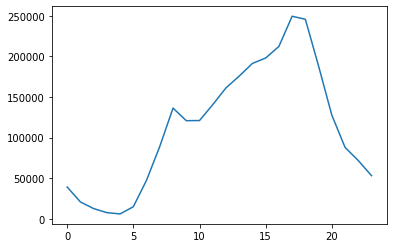

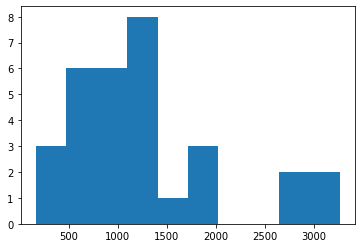

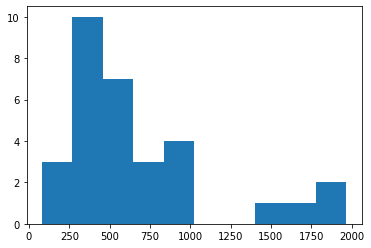

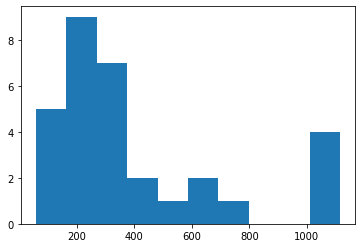

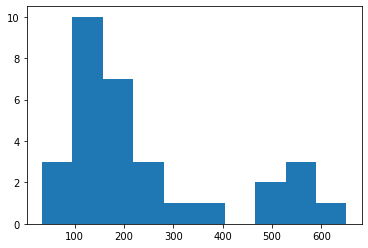

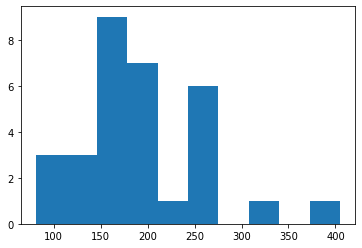

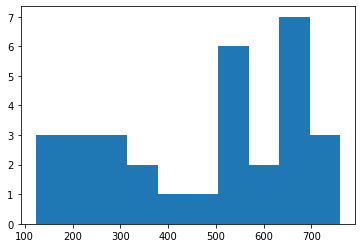

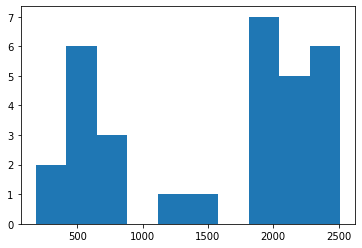

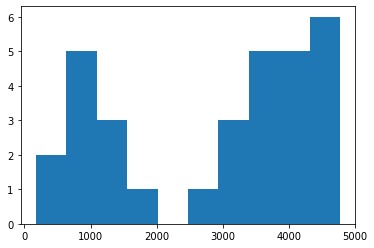

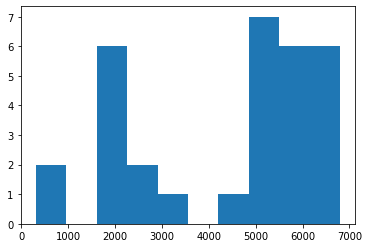

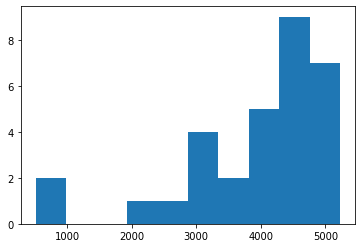

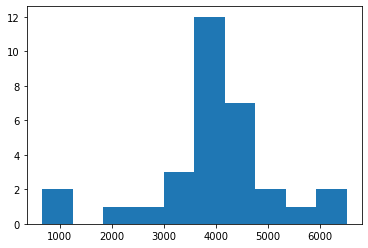

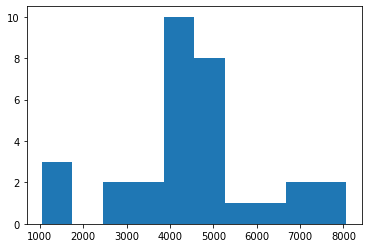

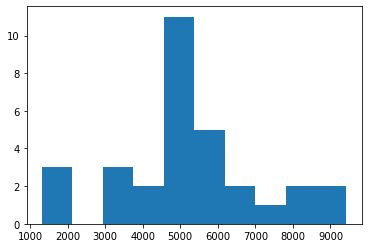

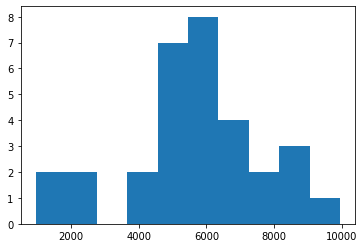

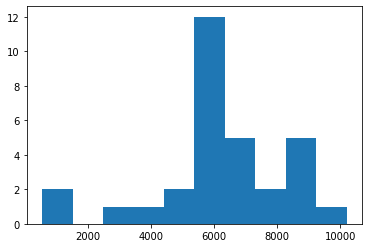

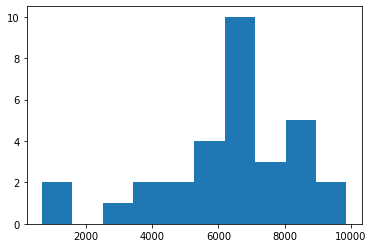

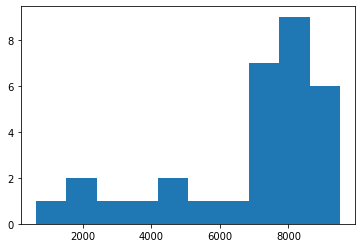

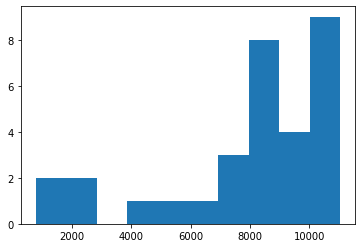

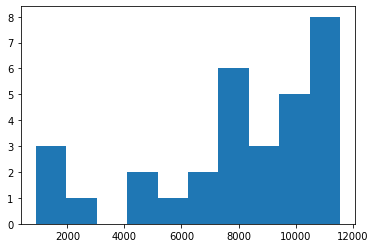

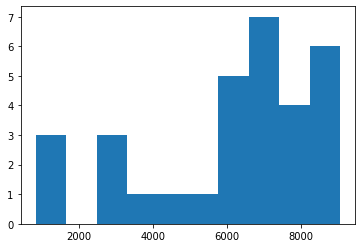

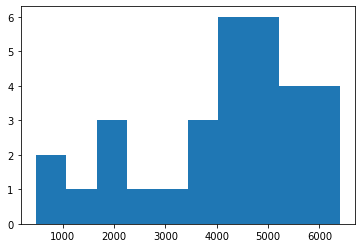

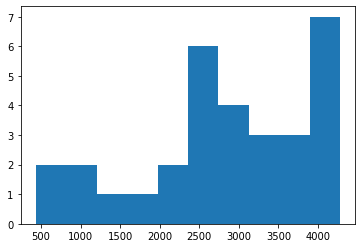

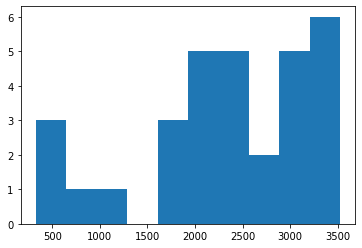

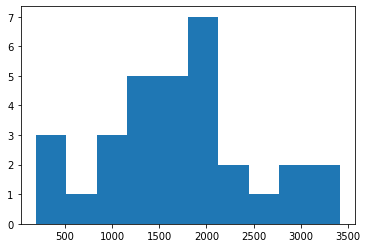

In [32]:
plt.plot(sum_hours)
plt.show()
for i in range(24):
    plt.hist(hours[i])
    plt.show()

In [ ]:
min(metro[start_time]),max(metro[start_time]),metro.shape

In [71]:
print(metro['start_time'])

0          1/1/2021 1:45
1          1/1/2021 2:35
2          1/1/2021 4:28
3          1/1/2021 4:43
4          1/1/2021 5:53
              ...       
40853    3/31/2021 21:26
40854    3/31/2021 21:27
40855    3/31/2021 21:28
40856    3/31/2021 21:29
40857    3/31/2021 22:38
Name: start_time, Length: 40858, dtype: object


In [89]:
interval = 60*24
radius = 50
epsilon = 20
start_time_m = datetime(day=9,month=3,year=2021,hour=5,minute=0)
td = timedelta(minutes=interval)
mdata = metro.loc[(metro[start_time]>start_time_m)&(metro[start_time]<td+start_time_m),].dropna()
mstations = {station:{'change':0,'x':0,'y':0} for station in list(set(mdata[start_station_name].unique()).union(mdata[end_station_name].unique()))}

In [90]:
for i in mdata.index:
    start_station = mdata.loc[i,start_station_name]
    mstations[start_station]['change'] -=1 
    x,y,_,_ = utm.from_latlon(mdata.loc[i,'start_lat'],mdata.loc[i,'start_lng'])
    mstations[start_station]['x'] = x
    mstations[start_station]['y'] = y
    
    end_station = mdata.loc[i,end_station_name]
    mstations[end_station]['change'] +=1 
    x,y,_,_ = utm.from_latlon(mdata.loc[i,'end_lat'],mdata.loc[i,'end_lng'])
    mstations[end_station]['x'] = x
    mstations[end_station]['y'] = y



42


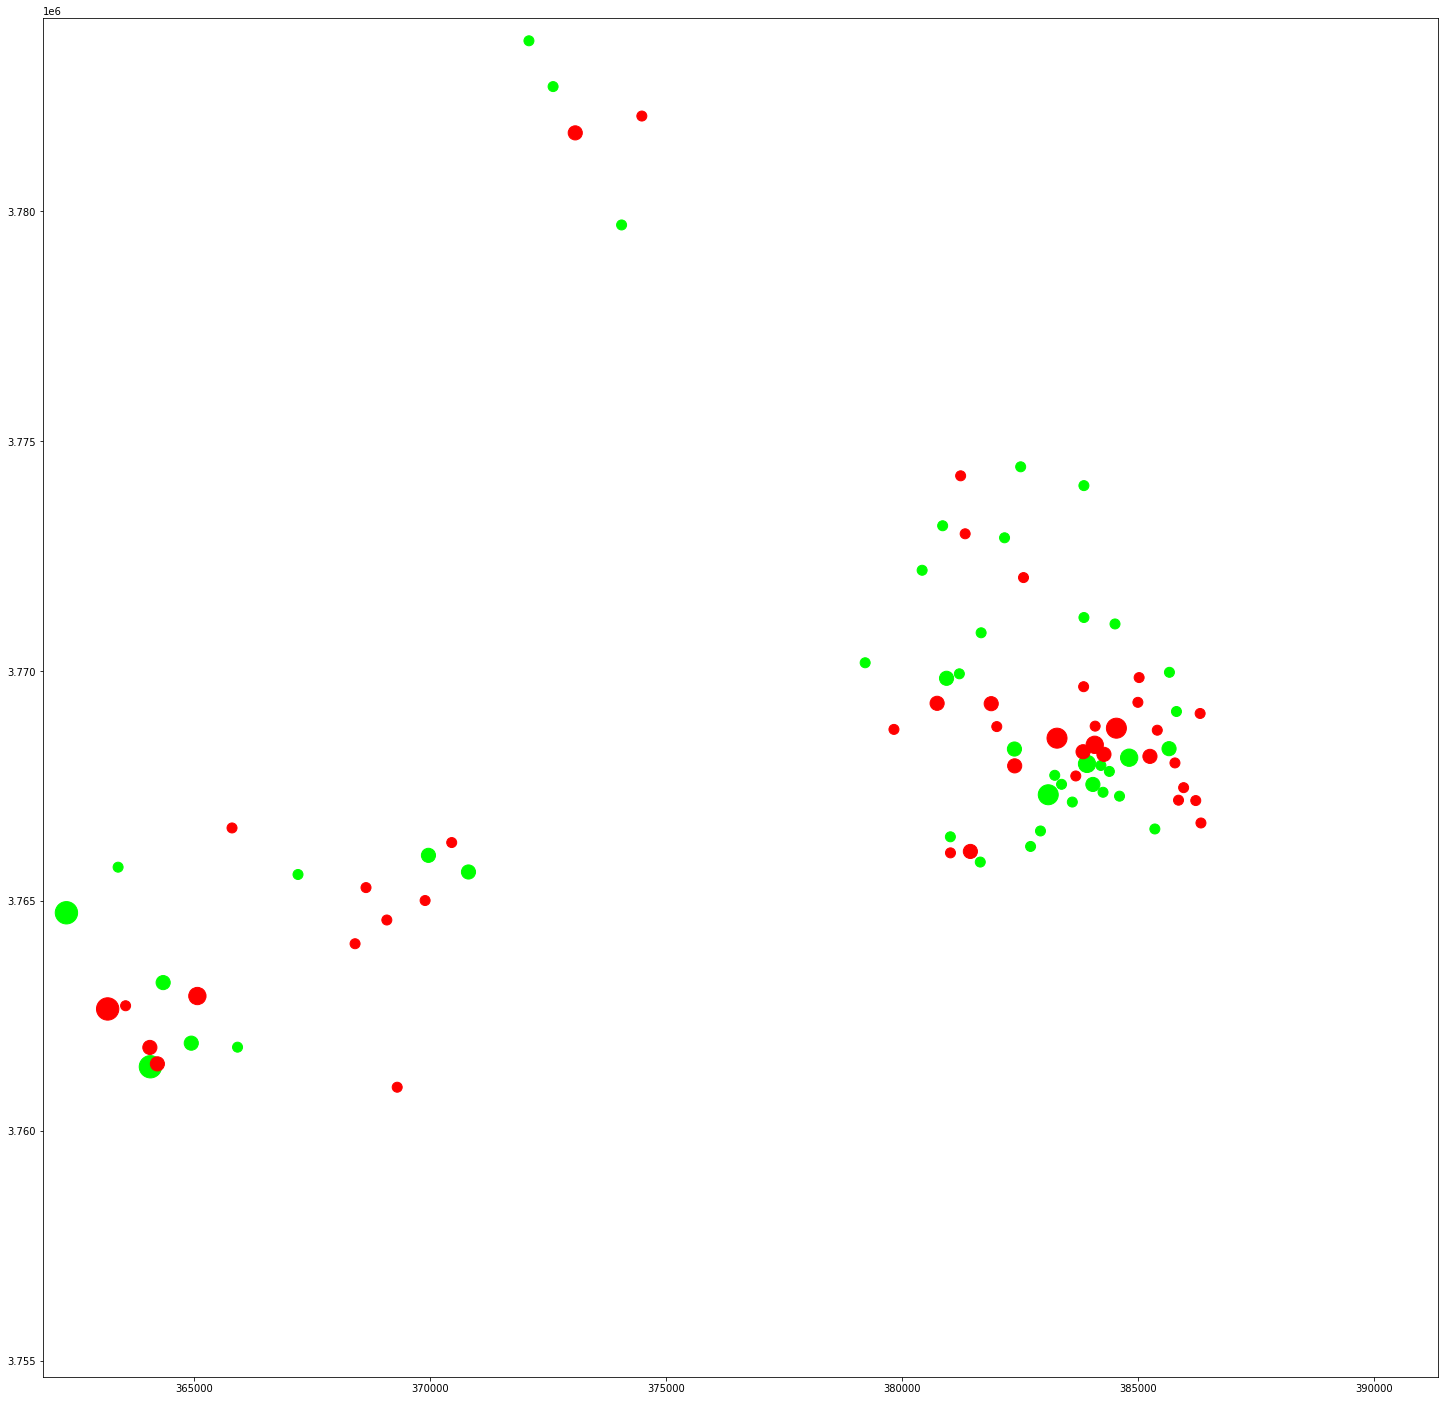

In [91]:
x=[mstations[i]['x'] for i in mstations.keys()]
y=[mstations[i]['y'] for i in mstations.keys()]
change=[mstations[i]['change'] for i in mstations.keys()]
delta = max([max(x)-min(x),max(y)-min(y)])+500
plt.figure(figsize=(25, 25))
plt.xlim(min(x)-500,min(x)+delta)
plt.ylim(min(y)-500,min(y)+delta)
xo = [x[i] for i in range(len(x)) if change[i] >0]
yo = [y[i] for i in range(len(y)) if change[i] >0]
changeo = [change[i] for i in range(len(x)) if change[i] >0]

yu = [y[i] for i in range(len(y)) if change[i] <0]
xu = [x[i] for i in range(len(x)) if change[i] <0]
changeu = [change[i] for i in range(len(y)) if change[i] <0]
print(len(changeu))


plt.scatter(xo,yo,s=100*np.array(changeo),color='#00ff00')
plt.scatter(xu,yu,s=100*np.abs(changeu),color='#ff0000')
plt.show()

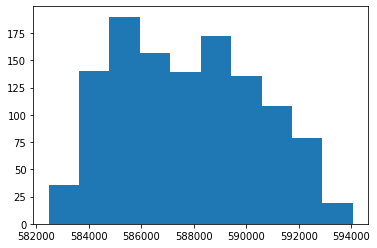

In [40]:
plt.hist(x)
plt.show()

In [ ]:
print(i)fdaf

In [ ]:
interval = 180
radius = 50
epsilon = 20
start_time_dt = data[start_time][np.random.choice(data.index)]
start_time_dt = datetime(day=5,month=5,year=2021,hour=15,minute=0)
td = timedelta(minutes=interval)
e_cwgraph = build_cwgraph(data, start_time_dt, start_time_dt + td, radius=radius, epsilon=epsilon)
e_data = pd.DataFrame([[e_cwgraph.nodes[station]['x'],e_cwgraph.nodes[station]['y'],e_cwgraph.nodes[station]['change']]for station in e_cwgraph if e_cwgraph.nodes[station]['type'] !='worker'])


In [ ]:
e_data.index= [station for station in e_cwgraph if e_cwgraph.nodes[station]['type'] !='worker']
e_data.columns=['lon','lat','change']
e_data.head()

In [95]:
color = ['ff0000' if i > 0 else '0000ff' for i in m_data.change.values]
size = e_data.change.values
x=e_data.lon.values
y=e_data.lat.values
plt.scatter(x,y,c=np.sign(e_data.change.values)+1,size=size)
plt.show()


NameError: name 'm_data' is not defined

In [99]:
sorted(metro['start_time'].values.tolist(),reverse=True)

['3/9/2021 9:58',
 '3/9/2021 9:54',
 '3/9/2021 9:54',
 '3/9/2021 9:49',
 '3/9/2021 9:48',
 '3/9/2021 9:41',
 '3/9/2021 9:39',
 '3/9/2021 9:34',
 '3/9/2021 9:32',
 '3/9/2021 9:28',
 '3/9/2021 9:26',
 '3/9/2021 9:26',
 '3/9/2021 9:25',
 '3/9/2021 9:25',
 '3/9/2021 9:22',
 '3/9/2021 9:18',
 '3/9/2021 9:17',
 '3/9/2021 9:17',
 '3/9/2021 9:14',
 '3/9/2021 9:11',
 '3/9/2021 9:06',
 '3/9/2021 9:06',
 '3/9/2021 9:05',
 '3/9/2021 9:04',
 '3/9/2021 9:02',
 '3/9/2021 9:01',
 '3/9/2021 8:51',
 '3/9/2021 8:51',
 '3/9/2021 8:45',
 '3/9/2021 8:39',
 '3/9/2021 8:35',
 '3/9/2021 8:32',
 '3/9/2021 8:31',
 '3/9/2021 8:27',
 '3/9/2021 8:25',
 '3/9/2021 8:21',
 '3/9/2021 8:18',
 '3/9/2021 8:13',
 '3/9/2021 8:02',
 '3/9/2021 7:58',
 '3/9/2021 7:57',
 '3/9/2021 7:48',
 '3/9/2021 7:24',
 '3/9/2021 7:07',
 '3/9/2021 7:05',
 '3/9/2021 7:05',
 '3/9/2021 6:59',
 '3/9/2021 6:58',
 '3/9/2021 6:43',
 '3/9/2021 6:42',
 '3/9/2021 6:29',
 '3/9/2021 5:53',
 '3/9/2021 5:35',
 '3/9/2021 2:10',
 '3/9/2021 23:51',
 '3/9/202